# Analysis of Online Retail Dataset

The demand for online purchase has exponentially increased with the evolution of mobiles and the shift from calling to browsing. This market has proven to have a global reach than being confined to a physical location and demand for its customers physical presence.

An online retail company, a non-store-based venture, has been logging its sales and customer details. A few of the e-visitors either do not complete their shopping or products have been returned with many comments. This leads for the need of business solution by the company to prevent its losses and increase the revenue. 

### Feature information:
1. InvoiceNo- Invoice printed has unique id
2. StockCode - Products are segemented with unique code
3. Description - Product description.
4. Quantity - Number of products purchased
5. InvoiceDate - The day product was purchased written in invoice.
6. UnitPrice - The price of 1 prduct
7. CustomerID - Unique ID given to customer by the company
8. Country - Country from which purchase is made

## Problem Statement:-

### Customer Congregation based on revenue made and frequency of purchase and retention factor using clustering. 

The company has a huge pool of customers that vary diversely in terms of location, frequency of purchase and product purchased. Therefore, a common marketing strategy to encapsulate all would not work. How do we group the customers into categories such that different groups can be targeted appropriately and enable more focussed strategies to be applied?

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## Reading the Dataset

In [2]:
data = pd.read_csv('Online_Retail_Service.csv',sep=",", encoding="ISO-8859-1", header=0)
data.head()

C:\Users\sathv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [3]:
data.shape

(532619, 8)

Inference: The dataset contains 8 Features and 532619 data points.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


inference: The Invoice Date is Object type which should be converted to datetime.

In [5]:
#Converting the Invoice Date into datetime format

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],dayfirst=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null datetime64[ns]
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.5+ MB


In [7]:
#Removing the time from the Invoice Date feature

data['InvoiceDate'] = [d.date() for d in data['InvoiceDate']]

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],dayfirst=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null datetime64[ns]
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.5+ MB


In [11]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,532619.000000,532619.000000,397924.000000
mean,10.240010,3.847635,15294.315171
std,159.573967,41.758101,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## Checking for Null Values

In [12]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134695
Country             0
dtype: int64

In [13]:
# Calculating the Missing Values % contribution in the data frame

round(100*(data.isnull().sum())/len(data), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.29
Country         0.00
dtype: float64

1. The 'Description' feature consists of 0.27% of Null values which is very negligible, hence we can drop them.

2. The 'CustomerID' feature consists of 25% of Null values.

In [14]:
data.dropna(inplace=True) #Dropping Null values

In [15]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Null values have been removed.

In [16]:
data.shape

(397924, 8)

Inference: After the Null values are removed, the data points are reduced to 397924.

In [17]:
data['UnitPrice'][data['UnitPrice']==0].value_counts() #Checking for 0 Unit Price

0.0    40
Name: UnitPrice, dtype: int64

Inference: There are 40 data points with Unit Price 0 and hence can be dropped.

In [18]:
data.drop(data[data['UnitPrice']<=0].index,inplace=True)

In [19]:
data['UnitPrice'][data['UnitPrice']==0] #Checking for 0 Unit Price

Series([], Name: UnitPrice, dtype: float64)

Inference: The data points with 0 Unit Price are removed.

In [20]:
data['Quantity'][data['Quantity']<0] #Checking for -ve Quantity

Series([], Name: Quantity, dtype: int64)

Inference: There are no -ve quantity data points.

In [21]:
data[data['StockCode']=='POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01,18.0,12583.0,France
377,536403,POST,POSTAGE,1,2010-12-01,15.0,12791.0,Netherlands
1113,536527,POST,POSTAGE,1,2010-12-01,18.0,12662.0,Germany
5003,536840,POST,POSTAGE,1,2010-12-02,18.0,12738.0,Germany
5183,536852,POST,POSTAGE,1,2010-12-03,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
531912,581493,POST,POSTAGE,1,2011-12-09,15.0,12423.0,Belgium
531930,581494,POST,POSTAGE,2,2011-12-09,18.0,12518.0,Germany
532440,581570,POST,POSTAGE,1,2011-12-09,18.0,12662.0,Germany
532477,581574,POST,POSTAGE,2,2011-12-09,18.0,12526.0,Germany


## Removing invalid Stock Codes

In [22]:
rmv = ['POST','M','DOT','B','S','AMAZONFEE','BANK CHARGES','gift_0001_10','gift_0001_20','gift_0001_30','gift_0001_40','gift_0001_50']
for i in rmv:
    data.drop(data[data['StockCode']==i].index, inplace=True)

In [23]:
data[data['StockCode']=='POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [24]:
data.shape

(396473, 8)

# Feature Engineering :

## Creating a Revenue feature

In [25]:
data['Revenue']= data['Quantity'] * data['UnitPrice']

In [26]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


## Revenue generated from each Customer

In [27]:
revenue = data['Revenue'].groupby(data['CustomerID']).sum().reset_index()
revenue

,CustomerID,Revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40
...,...,...
4329,18280.0,180.60
4330,18281.0,80.82
4331,18282.0,178.05
4332,18283.0,2088.93


In [28]:
data[data['CustomerID']==13004]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
33654,539325,22720,SET OF 3 CAKE TINS PANTRY DESIGN,3,2010-12-17,4.95,13004.0,United Kingdom,14.85
33655,539325,22722,SET OF 6 SPICE TINS PANTRY DESIGN,4,2010-12-17,3.95,13004.0,United Kingdom,15.80
33656,539325,22915,ASSORTED BOTTLE TOP MAGNETS,12,2010-12-17,0.42,13004.0,United Kingdom,5.04
33657,539325,22922,FRIDGE MAGNETS US DINER ASSORTED,12,2010-12-17,0.85,13004.0,United Kingdom,10.20
33658,539325,22923,FRIDGE MAGNETS LES ENFANTS ASSORTED,12,2010-12-17,0.85,13004.0,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...
497017,579100,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2011-11-28,3.25,13004.0,United Kingdom,19.50
497018,579100,23697,A PRETTY THANK YOU CARD,12,2011-11-28,0.42,13004.0,United Kingdom,5.04
497019,579100,21790,VINTAGE SNAP CARDS,12,2011-11-28,0.85,13004.0,United Kingdom,10.20
497020,579100,22382,LUNCH BAG SPACEBOY DESIGN,10,2011-11-28,1.65,13004.0,United Kingdom,16.50


In [29]:
revenue_data = revenue.sort_values(by=['Revenue'],ascending=False)
revenue_data.head(10)

,CustomerID,Revenue
1689,14646.0,279138.02
4197,18102.0,259657.30
3725,17450.0,194550.79
3006,16446.0,168472.50
1879,14911.0,140450.72
55,12415.0,124564.53
1333,14156.0,117379.63
3768,17511.0,91062.38
0,12346.0,77183.60
2700,16029.0,72882.09


In [30]:
rv = revenue_data.head(10)

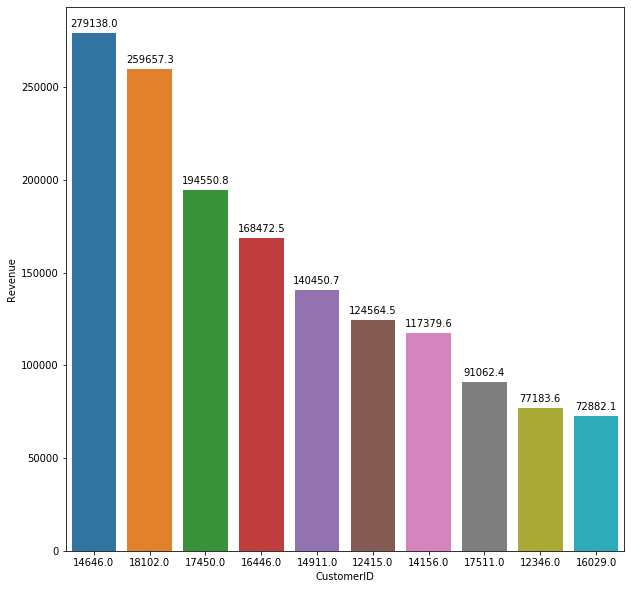

In [31]:
plt.figure(figsize=(10,10))
rev = sns.barplot(x='CustomerID',y='Revenue',data=rv,order=rv.sort_values('Revenue',ascending=False).CustomerID)

for p in rev.patches:
    rev.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. These are the top 10 revenue-generating customers out of 4334 and the customers 14646 and 18102 being the highest among all.

2. The revenue ranges from 276K to 72K for the top ten customers. 


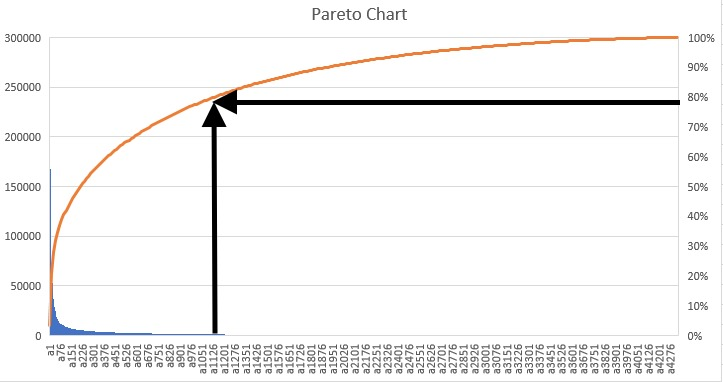

Inference:

1. From the above Pareto chart, we can see that 80% of Revenue is generated by 1125 customers out of the 4334 customers.
2. Hence, we can conclude that 25% of customers contribute to the 80% of the Revenue generated, which follows the Pareto principle.

## Calculating the Variety of products purchased by each Customer

In [32]:
# New Attribute : Frequency

products = data.groupby('CustomerID')['InvoiceNo'].nunique()
products= products.reset_index()
products.columns = ['CustomerID', 'Tot_Trans']
products

,CustomerID,Tot_Trans
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4329,18280.0,1
4330,18281.0,1
4331,18282.0,2
4332,18283.0,16


In [33]:
tot_t = products.sort_values('Tot_Trans',ascending=False)
tot_t.head(10)

,CustomerID,Tot_Trans
326,12748.0,206
1879,14911.0,199
4007,17841.0,124
562,13089.0,97
2176,15311.0,91
1661,14606.0,90
481,12971.0,86
1689,14646.0,72
795,13408.0,62
2700,16029.0,62


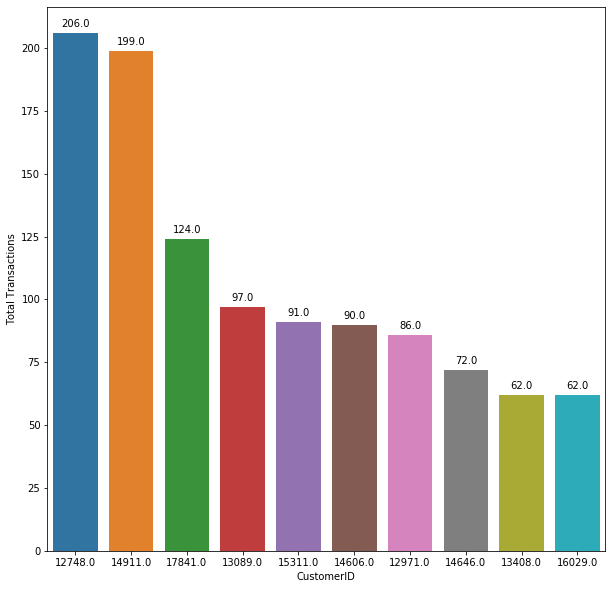

In [34]:
plt.figure(figsize=(10,10))
tt = sns.barplot(x='CustomerID', y='Tot_Trans', data=tot_t.head(10),order=tot_t.head(10).sort_values('Tot_Trans',ascending=False).CustomerID)
plt.ylabel('Total Transactions')

for p in tt.patches:
    tt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. These top 10 customers are repeat purchasers.  The range is from 206 to 62.
2. We may say a decent number of buyers may belong to a cluster of repeat buyers.
3. The sum of the number of transactions made by the purchaser in the whole year gives us an idea as to how regular the customer is.


## Calculating the frequency of purchase per year

In [35]:
data['Invoice_Month'] = data['InvoiceDate'].dt.strftime('%B')
data['Invoice_Year'] = data['InvoiceDate'].dt.year

In [36]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Invoice_Month,Invoice_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
...,...,...,...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,December,2011
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,December,2011
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,December,2011
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,December,2011


## Calculating the frequency of purchase per month in a particular year

In [37]:
# Monthly Frequency - For the year 2010

monthly_frequency = data[data['Invoice_Year']==2010].groupby('Invoice_Month')['InvoiceNo'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
monthly_frequency

,Month,Frequency
0,December,26065


In [38]:
# Monthly Frequency - For the year 2011

monthly_frequency = data[data['Invoice_Year']==2011].groupby('Invoice_Month')['InvoiceNo'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
mf = monthly_frequency.sort_values(by = 'Frequency',ascending = False)
mf

,Month,Frequency
9,November,64323
10,October,49381
11,September,39888
8,May,28216
6,June,27090
7,March,27069
1,August,26907
5,July,26730
0,April,22563
4,January,21141


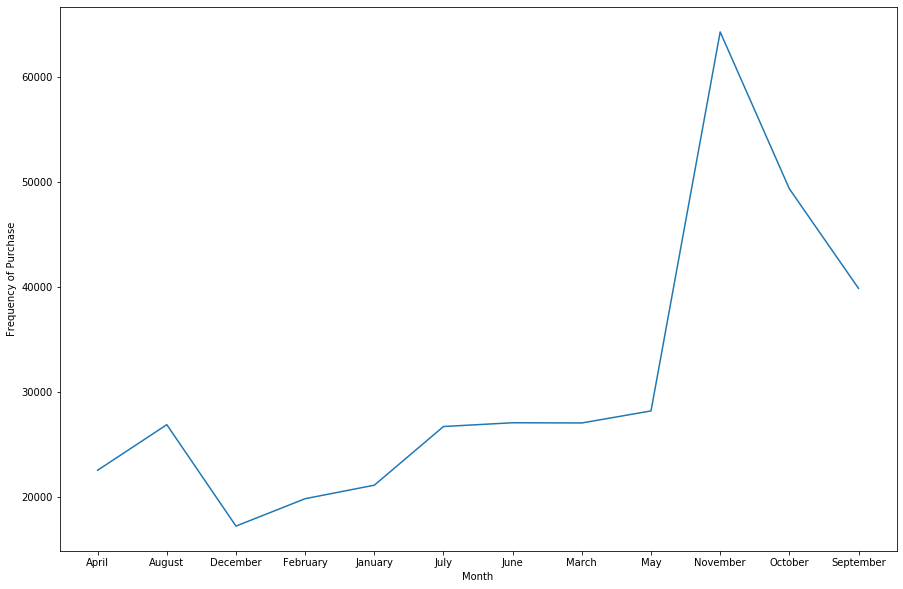

In [39]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Month', y='Frequency',data=mf)
plt.ylabel('Frequency of Purchase')
plt.show()

Inference:

1. We can see that the number of products purchased is high in the month of November. With Thanksgiving and Christmas around the corner, the sales of gift items skyrocket’s in this month.
2. The shopkeepers purchase in bulk to keep their stocks ready for the two festivals and have some leftover for the subsequent months, hence we see a sharp dip right after November.


In [40]:
# We observe that November has the highest amount of transactions. The shop is a custom gift shop and thus has a very high amount of buyers during the christmas season.
# The months after the peak see a dramatic fall in purchases. Most purchasers are dealers of gift items that already have their stocks full and loaded and this runs out slowly. 


## Total Quantity of purchase per customer

In [41]:
tot_quantity = data['Quantity'].groupby(data['CustomerID']).sum().reset_index()
tot_quantity.sort_values(by = 'Quantity')

,CustomerID,Quantity
4094,17956.0,1
824,13452.0,2
3012,16454.0,2
3483,17102.0,2
2871,16257.0,2
...,...,...
0,12346.0,74215
55,12415.0,77373
1879,14911.0,80263
3006,16446.0,80997


In [42]:
tot_q = tot_quantity.sort_values(by = 'Quantity',ascending=False)
tot_q

,CustomerID,Quantity
1689,14646.0,196844
3006,16446.0,80997
1879,14911.0,80263
55,12415.0,77373
0,12346.0,74215
...,...,...
824,13452.0,2
2321,15510.0,2
3012,16454.0,2
3483,17102.0,2


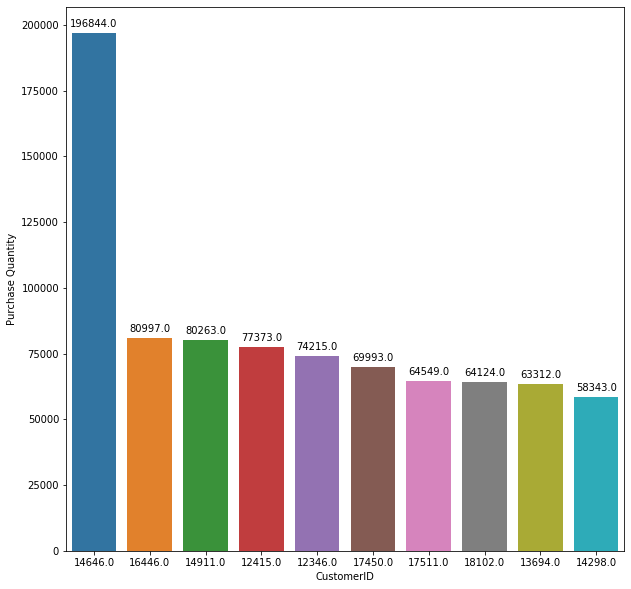

In [43]:
plt.figure(figsize=(10,10))
quan = sns.barplot(x = 'CustomerID',y='Quantity',data=tot_q.head(10),order=tot_q.head(10).sort_values('Quantity',ascending=False).CustomerID)
plt.ylabel('Purchase Quantity')

for p in quan.patches:
    quan.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. Customer number 14646 has the highest amount of quantity purchased of 196K. The customer is a wholesale buyer.

2. The Top 10 ranges from 196K to 58K, who will be classified as wholesale buyers. With good discounts, these buyers can be retained as well as expect an increase in buying quantity.


CustomerID = 14646 has the highest purchase in terms of quantity purchased. 

# Repeat Buyers

Although many purchases of bulk quatities were made in the year, what is of more importance to any retail unit is the ability to retain its customers.
We therefore calculate the number of days in a year the customer has bought a product. 

In [44]:

uniquedates = data.groupby('CustomerID')['InvoiceDate'].nunique()
uniquedates= uniquedates.reset_index()

uniquedates.columns = ['CustomerID', 'Retention']
uniquedates

,CustomerID,Retention
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4329,18280.0,1
4330,18281.0,1
4331,18282.0,2
4332,18283.0,14


In [45]:
uniquedates['Retention'].max()

131

In [46]:
ret = uniquedates.sort_values('Retention',ascending=False)
ret.head(10)

,CustomerID,Retention
1879,14911.0,131
326,12748.0,113
4007,17841.0,112
2176,15311.0,90
1661,14606.0,88
481,12971.0,71
562,13089.0,66
1602,14527.0,54
1069,13798.0,53
2988,16422.0,48


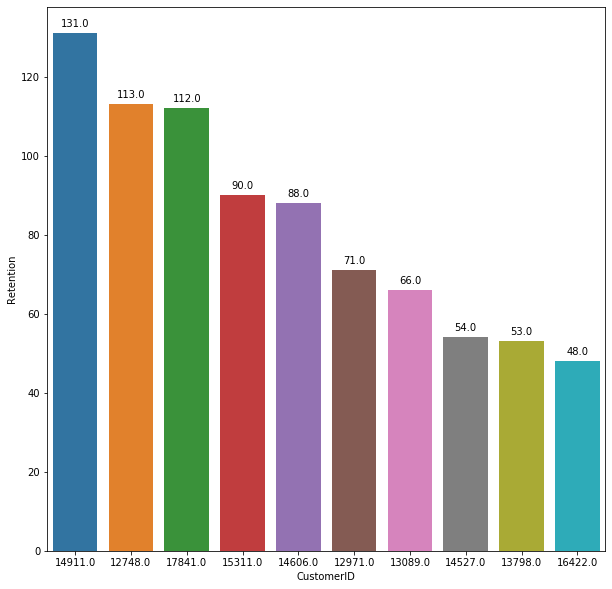

In [47]:
plt.figure(figsize=(10,10))
ret = sns.barplot(x='CustomerID', y='Retention', data=ret.head(10),order=ret.head(10).sort_values('Retention',ascending=False).CustomerID)


for p in ret.patches:
    ret.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. Repeat purchase is important for every retail outlet. The retention factor here gives us an insight as to how many days in the year a customer has made a purchase. 
2. A high retention value of 131 shows that on 131 days in a year the customer made a purchase, which is almost once in 3 days. This enables us to predict his next purchase accurately and have stock ready.


# Unique Products Purchased

We then calculate the total number of different products a customer purchases in a year from the shop.

In [48]:
prod_var = data.groupby('CustomerID')['StockCode'].nunique()
prod_var= prod_var.reset_index()
prod_var.columns = ['CustomerID', 'uniqueproducts']
prod_var

,CustomerID,uniqueproducts
0,12346.0,1
1,12347.0,103
2,12348.0,21
3,12349.0,72
4,12350.0,16
...,...,...
4329,18280.0,10
4330,18281.0,7
4331,18282.0,12
4332,18283.0,262


In [49]:
unq_pr = prod_var.sort_values('uniqueproducts',ascending=False)
unq_pr.head(10)

,CustomerID,uniqueproducts
1879,14911.0,1786
326,12748.0,1766
4007,17841.0,1322
1289,14096.0,1118
1434,14298.0,884
1661,14606.0,816
1779,14769.0,717
1333,14156.0,714
1689,14646.0,699
562,13089.0,636


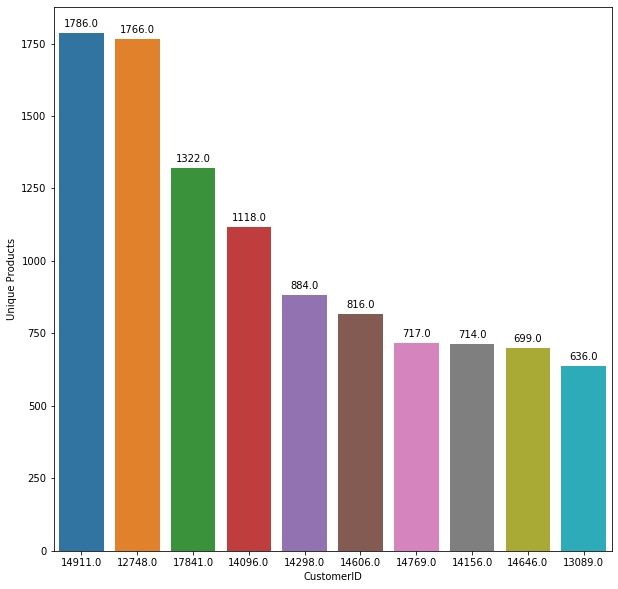

In [50]:
plt.figure(figsize=(10,10))
unip = sns.barplot(x='CustomerID', y='uniqueproducts', data=unq_pr.head(10),order=unq_pr.head(10).sort_values('uniqueproducts',ascending=False).CustomerID)
plt.ylabel('Unique Products')

for p in unip.patches:
    unip.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

The shop sells a wide variety of products. Since most of the customers are retailers, it gives us a valuable insight to know how many of the products in the shop each retailer purchases.

In [51]:

cdata= pd.merge(revenue,products, on='CustomerID', how='inner')
cdata.columns = ['CustomerID', 'Revenue', 'Tot_Trans']
cdata.head()
cdata2= pd.merge(tot_quantity,uniquedates, on='CustomerID', how='inner')
cdata2.head()
cdata3 = pd.merge(prod_var,cdata2,on='CustomerID')
#cdata4 = pd.merge(cdata3,loc,on = 'CustomerID')

csdata = pd.merge(cdata,cdata3,on = 'CustomerID',how = 'inner')
csdata

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,77183.60,1,1,74215,1
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2
4332,18283.0,2088.93,16,262,1395,14


In [52]:
csdata1 = csdata.drop('CustomerID',axis=1)

In [53]:
csdata1.describe()

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,2023.016302,4.247116,61.433549,1190.007153,3.848408
std,8924.198162,7.643124,85.312905,5043.301380,5.931010
min,3.750000,1.000000,1.000000,1.000000,1.000000
25%,305.867500,1.000000,16.000000,160.000000,1.000000
50%,668.125000,2.000000,35.000000,379.000000,2.000000
75%,1631.622500,5.000000,77.000000,991.750000,4.000000
max,279138.020000,206.000000,1786.000000,196844.000000,131.000000


In [54]:
correl_cs = csdata1.corr()
correl_cs

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
Revenue,1.000000,0.550672,0.381083,0.923565,0.491057
Tot_Trans,0.550672,1.000000,0.691574,0.557049,0.969709
uniqueproducts,0.381083,0.691574,1.000000,0.410017,0.685692
Quantity,0.923565,0.557049,0.410017,1.000000,0.505253
Retention,0.491057,0.969709,0.685692,0.505253,1.000000


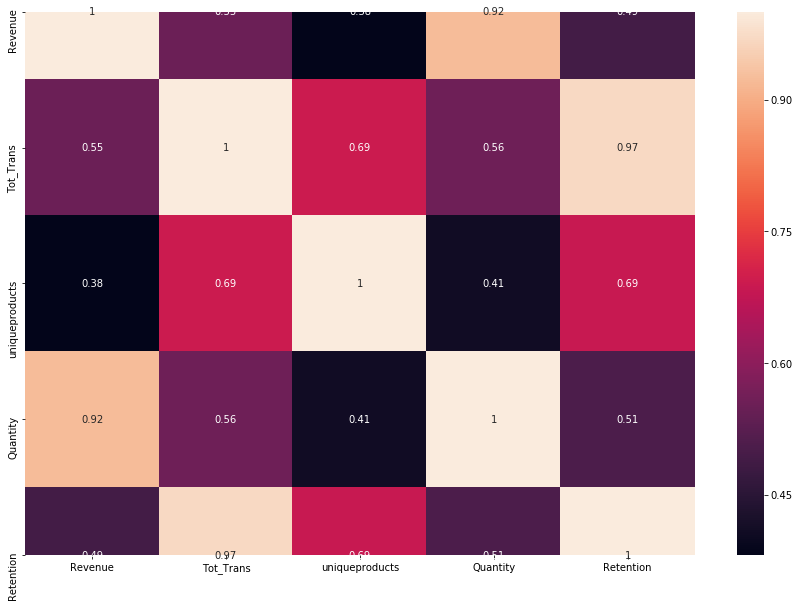

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(correl_cs,annot = True)

Inference:

1. As we can see from the above correlation plot, Customer Retention is strongly correlated with the Total transactions and Unique products purchased.
2. The more unique products and the customer purchases the sooner he comes back to the shop.


In [56]:
csdata

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,77183.60,1,1,74215,1
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2
4332,18283.0,2088.93,16,262,1395,14


In [57]:
csdata1 = csdata.drop('CustomerID',axis = 1)
csdata1

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,77183.60,1,1,74215,1
1,4310.00,7,103,2458,7
2,1437.24,4,21,2332,4
3,1457.55,1,72,630,1
4,294.40,1,16,196,1
...,...,...,...,...,...
4329,180.60,1,10,45,1
4330,80.82,1,7,54,1
4331,178.05,2,12,103,2
4332,2088.93,16,262,1395,14


# Scaling the data before modelling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
sc =StandardScaler()
csdatasc = sc.fit_transform(csdata1)
csc = pd.DataFrame(csdatasc)
csc.columns = csdata1.columns

In [60]:
csc

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687
4332,0.007387,1.537884,2.351222,0.040651,1.711810


# Model Building

# Clustering

## Iteration 1

#### K-Means

In [61]:
from sklearn.cluster import KMeans


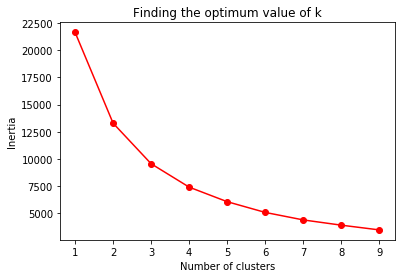

In [62]:
wcss = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(csc)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
wcss

[21669.99999999996,
 13287.287395838575,
 9545.389846712189,
 7389.699471297372,
 6046.753865720472,
 5058.072638145244,
 4367.125823118027,
 3883.328849533685,
 3446.5348870762045]

In [64]:

mod = KMeans(n_clusters=3,n_init=12,random_state=22)
mod.fit(csc)


KMeans(n_clusters=3, n_init=12, random_state=22)

In [65]:
mod.labels_

array([1, 0, 0, ..., 0, 2, 0])

In [66]:
mod.cluster_centers_

array([[-0.12544238, -0.21340089, -0.22445994, -0.12725202, -0.230524  ],
       [11.68638918,  8.73472529,  6.37348235, 11.90915898,  7.79167151],
       [ 0.51863214,  1.27261697,  1.43710899,  0.5242166 ,  1.4322999 ]])

In [67]:
centroids=mod.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(csc))
columns = list(csc)
centroid_df.columns=csc.columns
centroid_df

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,-0.125442,-0.213401,-0.224460,-0.127252,-0.230524
1,11.686389,8.734725,6.373482,11.909159,7.791672
2,0.518632,1.272617,1.437109,0.524217,1.432300


In [68]:
mod.inertia_

9545.389846712189

In [69]:
from sklearn import metrics
metrics.silhouette_score(csc,mod.labels_)

0.6880902638254195

In [70]:
csc_k = csc.copy()

In [71]:
csc_k['labels'] = mod.labels_

In [72]:
csc_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,1
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0
4332,0.007387,1.537884,2.351222,0.040651,1.711810,2


In [73]:
csc_k['labels'].value_counts()

0    3803
2     513
1      18
Name: labels, dtype: int64

#### AGC

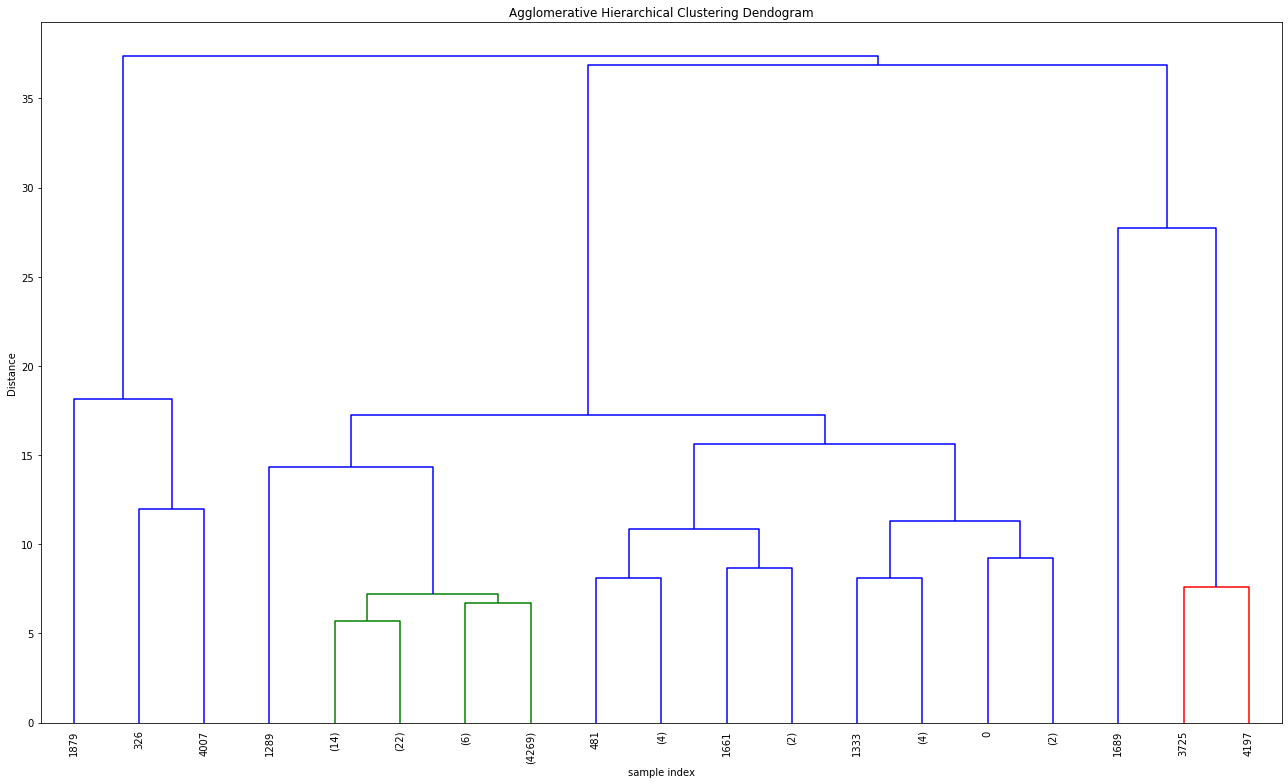

In [74]:
# Average Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

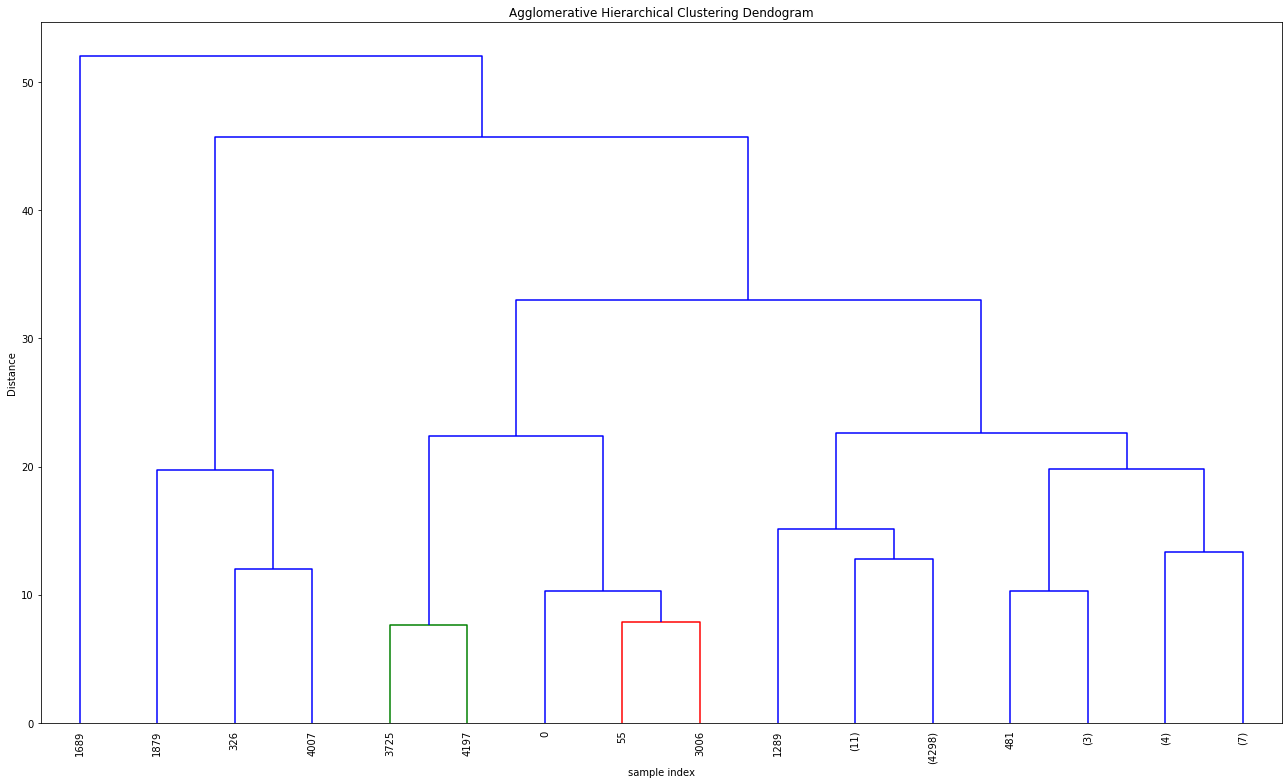

In [75]:
# Max Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

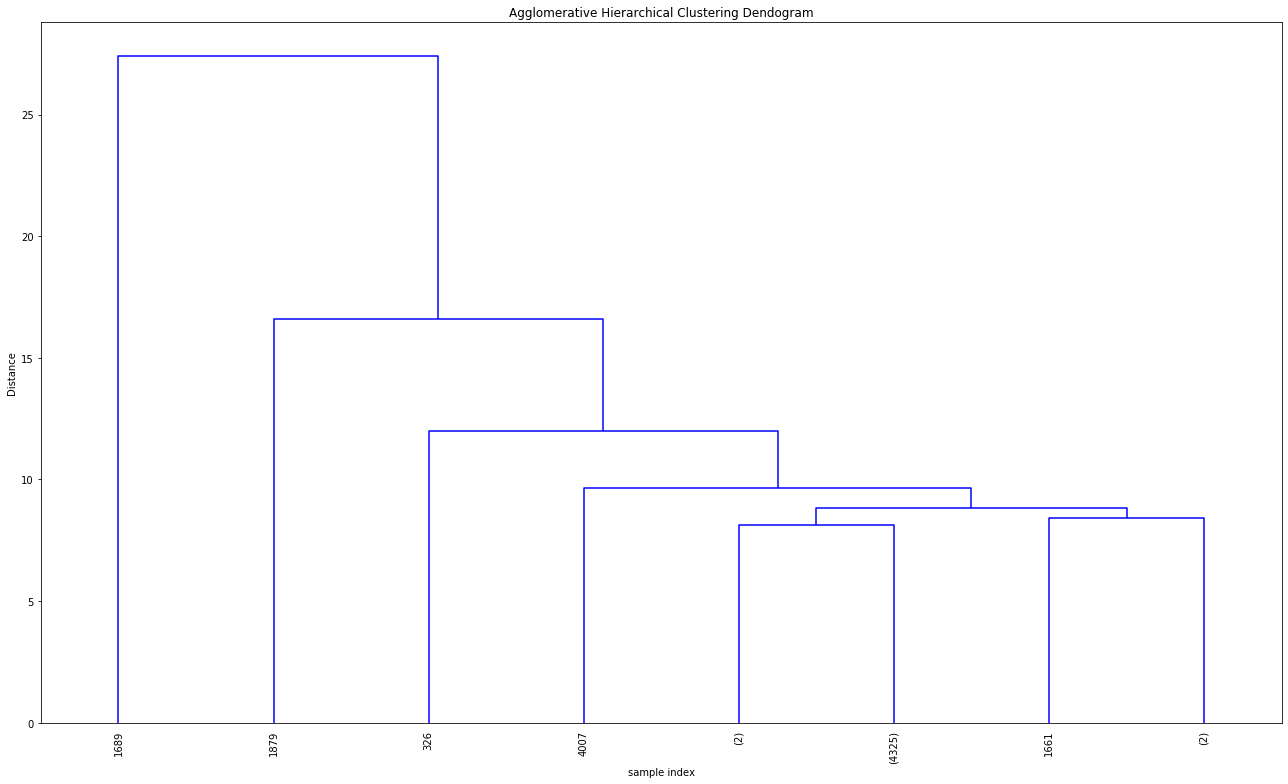

In [76]:
# Min Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

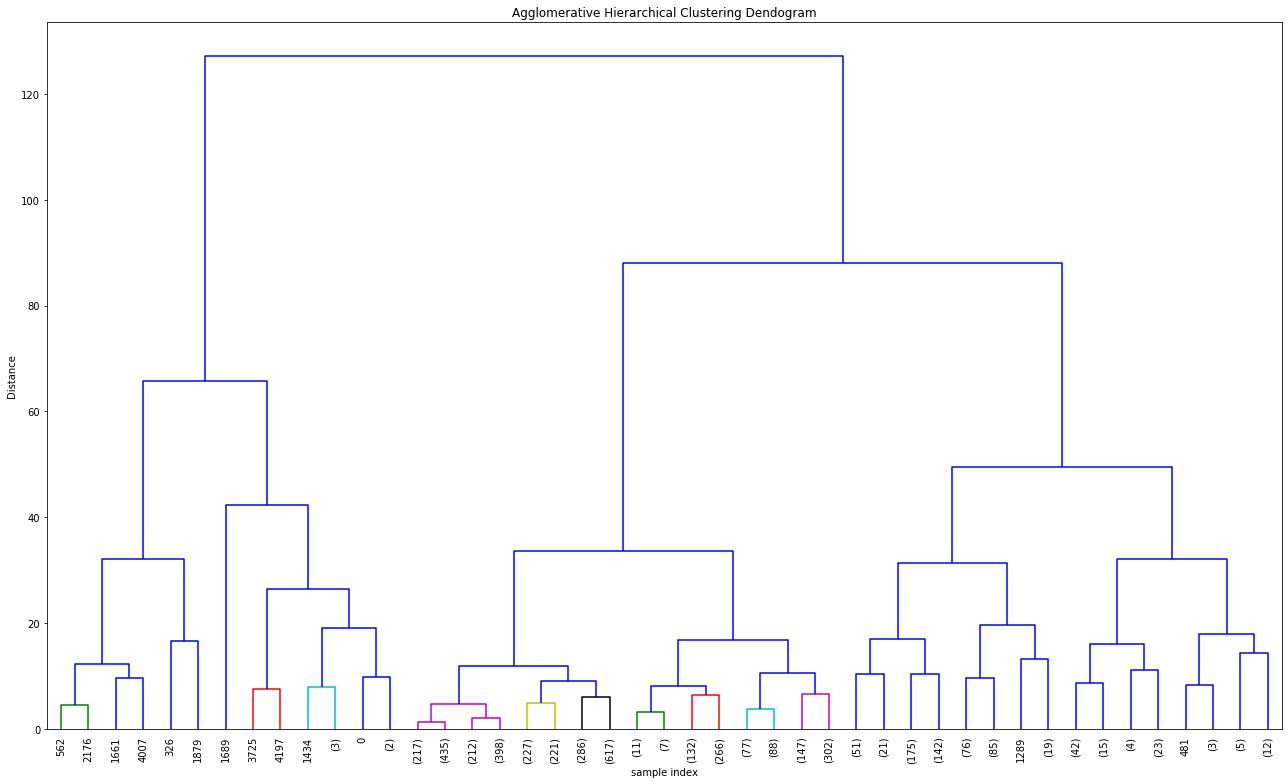

In [77]:
# Ward Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

Inference: 

1. Ward Linkage shows the best split of clusters and sub-clusters.
2. Hence, we build our model with the 'Ward' Linkage.

In [78]:
from sklearn.cluster import AgglomerativeClustering 
modagc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
modagc.fit(csc)

AgglomerativeClustering(n_clusters=3)

In [79]:
modagc.labels_

array([0, 1, 2, ..., 2, 1, 2], dtype=int64)

In [80]:
L=pd.DataFrame(modagc.labels_)
L[0].value_counts()

2    3643
1     675
0      16
Name: 0, dtype: int64

In [81]:
csc_a = csc.copy()

In [82]:
csc_a['labels']=modagc.labels_

In [83]:
csc_a

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,0
1,0.256297,0.360219,0.487280,0.251450,0.531437,1
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,2
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,2
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,2
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,2
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,2
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,2
4332,0.007387,1.537884,2.351222,0.040651,1.711810,1


In [84]:
csc_a['labels'].value_counts()

2    3643
1     675
0      16
Name: labels, dtype: int64

In [85]:
agc_clusters = csc_a.copy()

In [86]:
agc_clusters_group = agc_clusters.groupby(['labels'])
df0 = agc_clusters_group.get_group(0)
df1 = agc_clusters_group.get_group(1)
df2 = agc_clusters_group.get_group(2)

In [87]:
df0.shape

(16, 6)

In [88]:
df1.shape

(675, 6)

In [89]:
df2.shape

(3643, 6)

In [90]:
c0 = np.array(df0.mean())
c1 = np.array(df1.mean())
c2 = np.array(df2.mean())

In [91]:
c0 = c0[:-1]
c1 = c1[:-1]
c2 = c2[:-1]

In [92]:
agc_I0 = 0
agc_I1 = 0
agc_I2 = 0

for i in np.arange(df0.shape[0]):
    agc_I0 = agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_I1 = agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2 = agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)  

In [93]:
print("Inertia of AGC:",agc_I0+agc_I1+agc_I2)

Inertia of AGC: 9706.373615324464


In [94]:
metrics.silhouette_score(csc,modagc.labels_)

0.6565591394293558

## Iteration 1

### Observations: 

K-Means:

Class 0 : 3803

Class 1 : 18

Class 2 : 513

Inertia: 9545.389846712189

Silhouette Score: 0.6880902638254195

AGC:

Class 0: 16

Class 1: 675

Class 2: 3643

Inertia: 9706.373615324464

Silhoutte Score: 0.6565591394293558

Inference: K-Means is a better model than AGC.But the cluster sizes vary a lot. This brings about the need to search for subclusters.

In [95]:
csdata1 = csdata.copy()

In [96]:
csdata1['labels'] = mod.labels_

In [97]:
csdata1['labels'].value_counts()

0    3803
2     513
1      18
Name: labels, dtype: int64

In [98]:
csdata_high = csdata1[csdata1['labels']==1]
csdata_high

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77183.60,1,1,74215,1,1
55,12415.0,124564.53,20,443,77373,15,1
326,12748.0,32317.32,206,1766,25511,113,1
562,13089.0,58825.83,97,636,31070,66,1
996,13694.0,65039.62,50,366,63312,35,1
1333,14156.0,117379.63,55,714,57885,43,1
1434,14298.0,51527.30,44,884,58343,25,1
1661,14606.0,12006.65,90,816,6214,88,1
1689,14646.0,279138.02,72,699,196844,45,1
1879,14911.0,140450.72,199,1786,80263,131,1


In [99]:
csdata_sub = csdata1[csdata1['labels']!=1]
csdata_sub.drop('labels',axis=1,inplace=True)

C:\Users\sathv\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [100]:
csdata_sub

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
5,12352.0,1385.74,7,57,526,7
...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2
4332,18283.0,2088.93,16,262,1395,14


## Sub-Clustering 

In [101]:
#We take only clusters 0 and 1 to form sub clusters and explore further sub clustering possibilities.

#### AGC

In [102]:
subd1 = csc_k[csc_k.labels != 1]
subd1

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437,0
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0
4332,0.007387,1.537884,2.351222,0.040651,1.711810,2


In [103]:
subd11 = subd1.drop('labels',axis=1)
subd11

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687
4332,0.007387,1.537884,2.351222,0.040651,1.711810


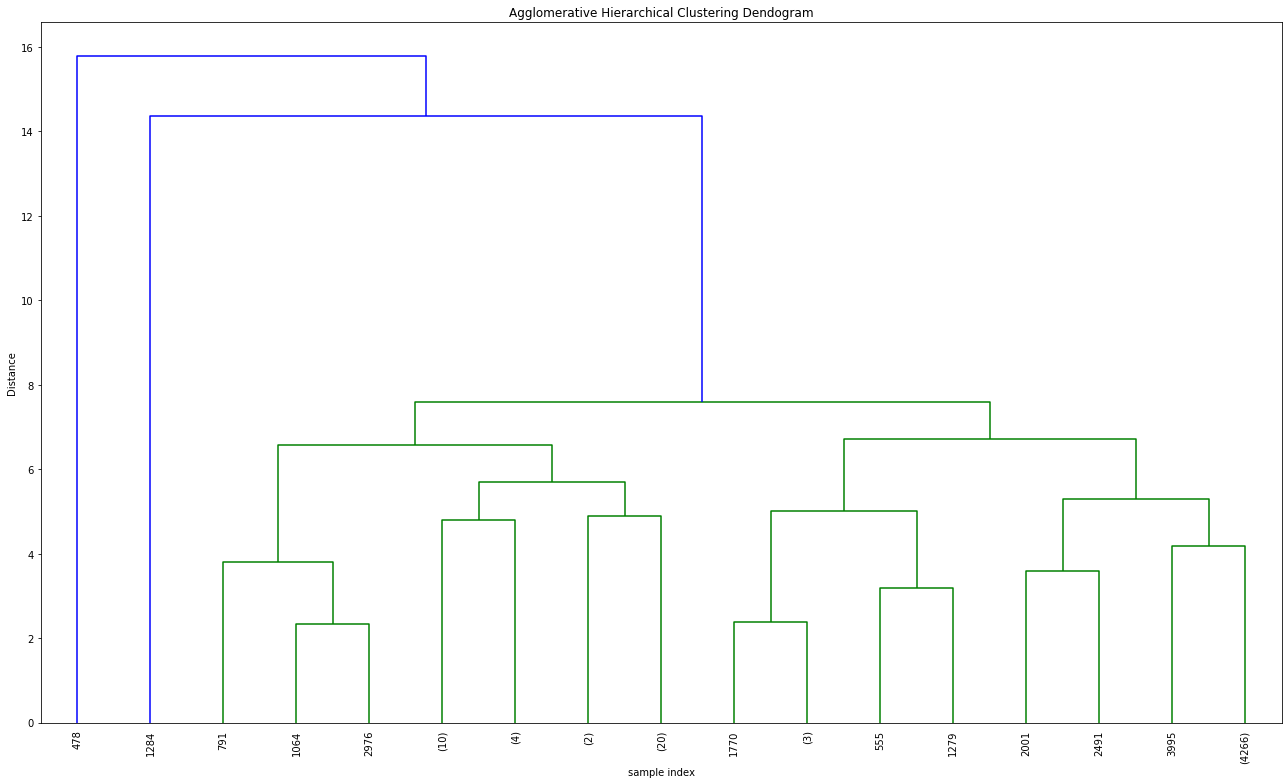

In [104]:
# Average Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

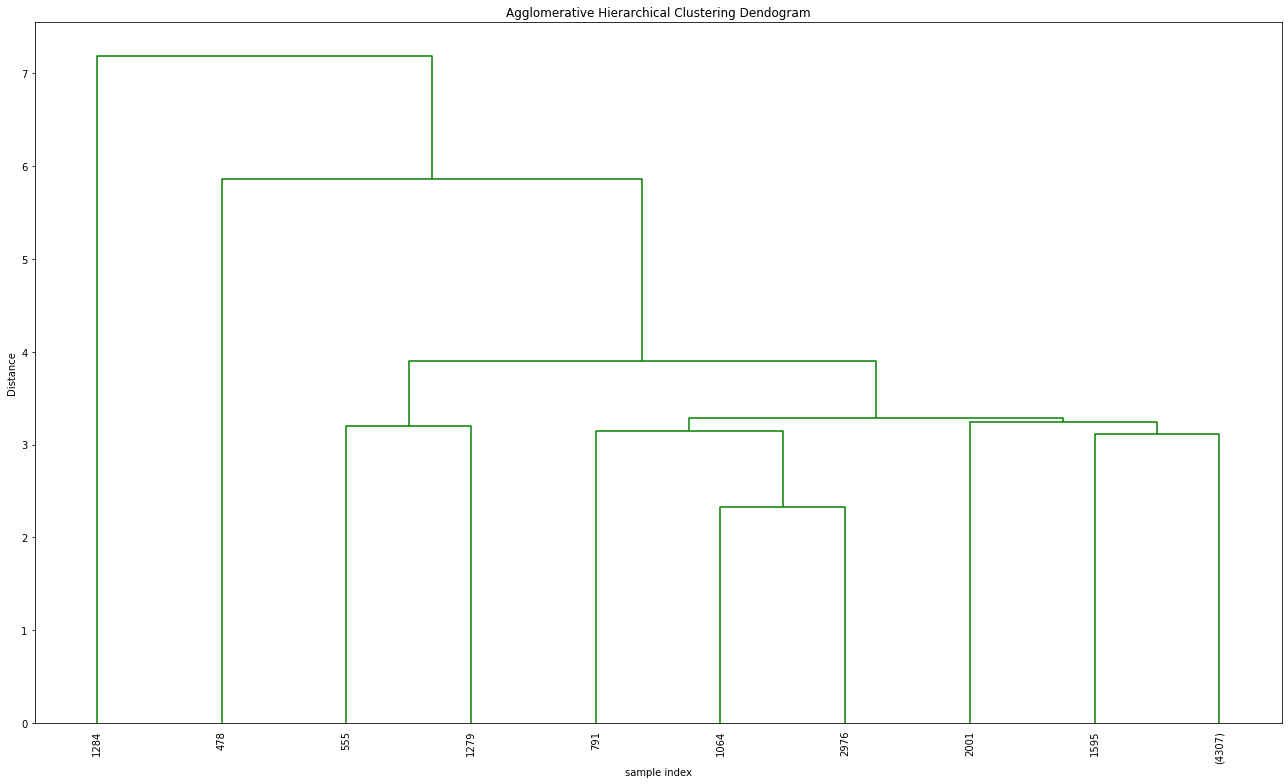

In [105]:
# Min Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

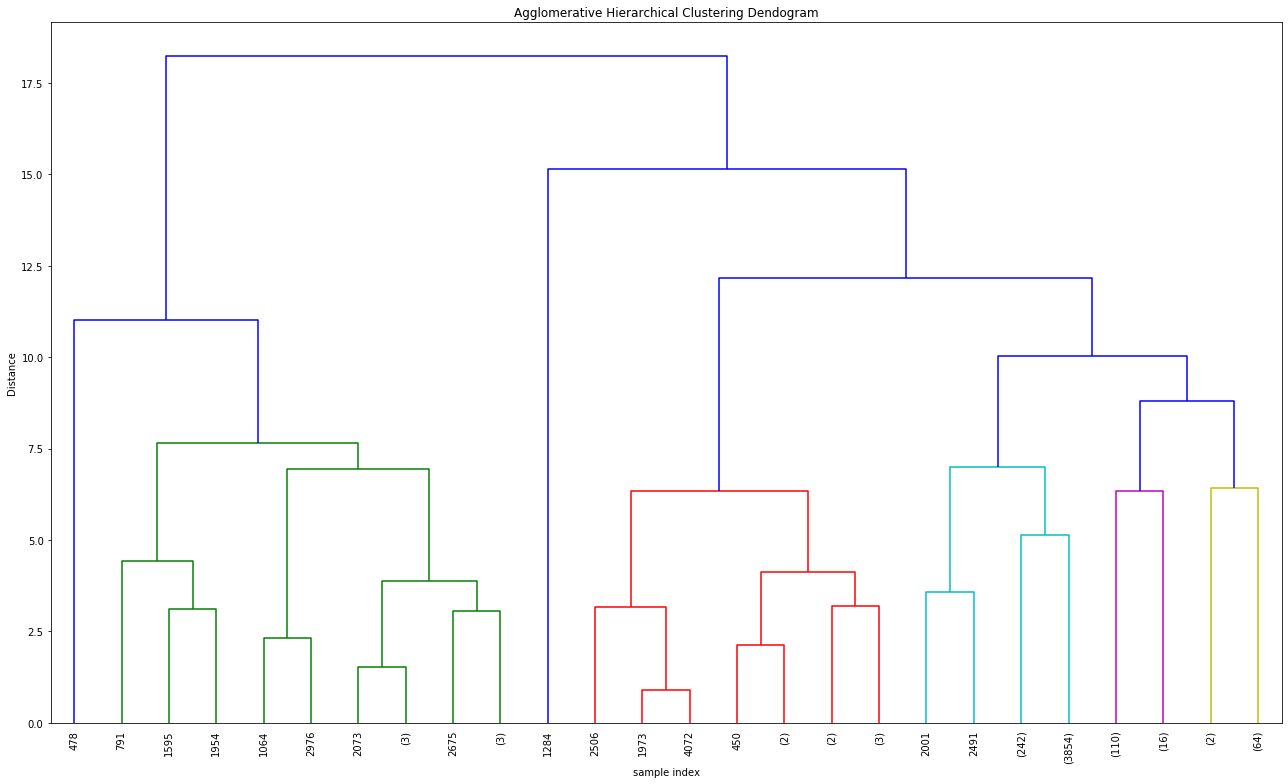

In [106]:
# Max Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

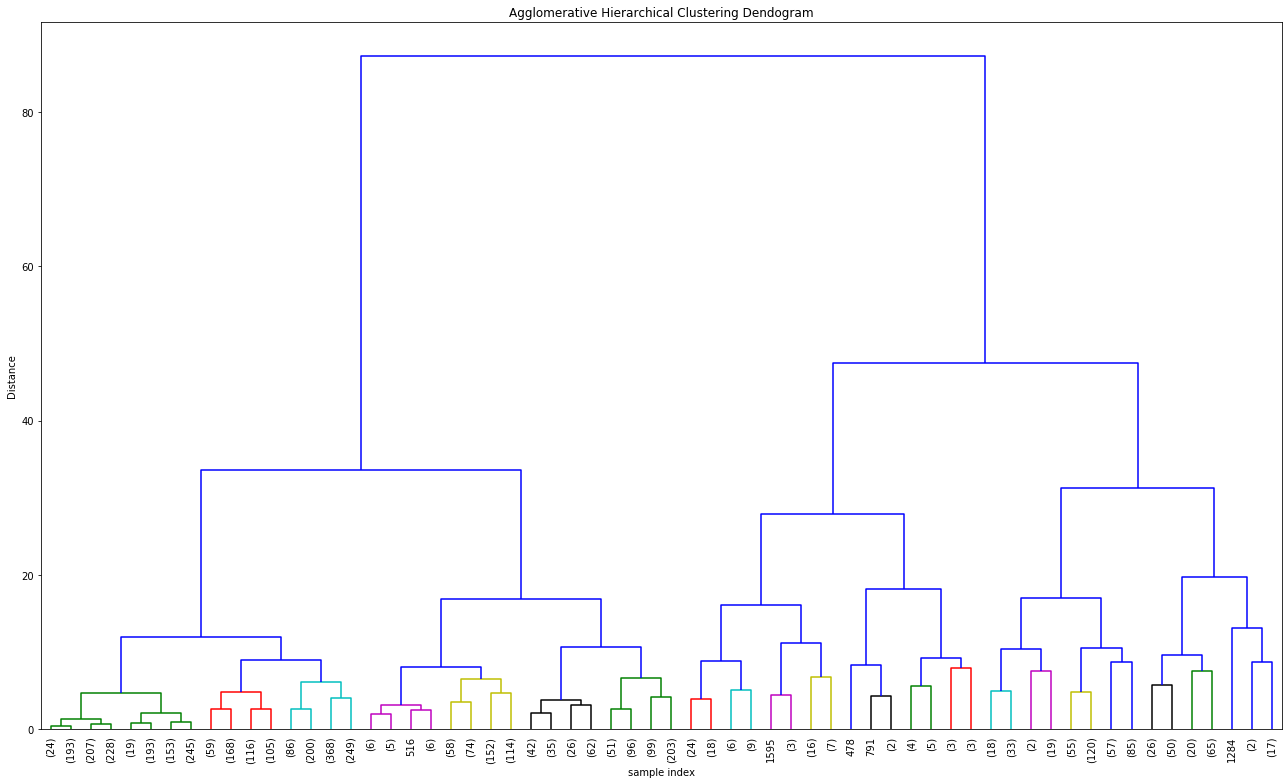

In [107]:
# Ward Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

Inference: 

1. Ward Linkage shows the best split of clusters and sub-clusters.
2. Hence, we build our model with the 'Ward' Linkage.

In [108]:
modsub1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
modsub1.fit(subd11)

AgglomerativeClustering(n_clusters=4)

In [109]:
M=pd.DataFrame(modsub1.labels_)
M[0].value_counts()

3    2613
1    1030
0     570
2     103
Name: 0, dtype: int64

In [110]:
subd11

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687
4332,0.007387,1.537884,2.351222,0.040651,1.711810


In [111]:
subd11_agc = subd11.copy()

In [112]:
subd11_agc['labels'] = modsub1.labels_

In [113]:
subd11_agc

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,3
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,3
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,3
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437,1
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,3
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,3
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,3
4332,0.007387,1.537884,2.351222,0.040651,1.711810,0


In [114]:
subd11_agc['labels'].value_counts()

3    2613
1    1030
0     570
2     103
Name: labels, dtype: int64

In [115]:
agc_clusters2 = subd11_agc.copy()

In [116]:
agc_clusters_group = agc_clusters2.groupby(['labels'])
df0 = agc_clusters_group.get_group(0)
df1 = agc_clusters_group.get_group(1)
df2 = agc_clusters_group.get_group(2)
df3 = agc_clusters_group.get_group(3)

In [117]:
df0.shape

(570, 6)

In [118]:
df1.shape

(1030, 6)

In [119]:
df2.shape

(103, 6)

In [120]:
df3.shape

(2613, 6)

In [121]:
c0 = np.array(df0.mean())
c1 = np.array(df1.mean())
c2 = np.array(df2.mean())
c3 = np.array(df3.mean())

In [122]:
c0 = c0[:-1]
c1 = c1[:-1]
c2 = c2[:-1]
c3 = c3[:-1]

In [123]:
agc_I0 = 0
agc_I1 = 0
agc_I2 = 0
agc_I3 = 0

for i in np.arange(df0.shape[0]):
    agc_I0 = agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_I1 = agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2 = agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)
for i in np.arange(df3.shape[0]):
    agc_I3 = agc_I3+np.sum((df3.iloc[i,:-1]-c3)**2)    

In [124]:
print("Inertia of AGC:",agc_I0+agc_I1+agc_I2+agc_I3)

Inertia of AGC: 3143.329167824849


In [125]:
silhoutte_a2 = silhouette_score(subd11, subd11_agc['labels'])
silhoutte_a2

0.4480914596053203

#### K-Means

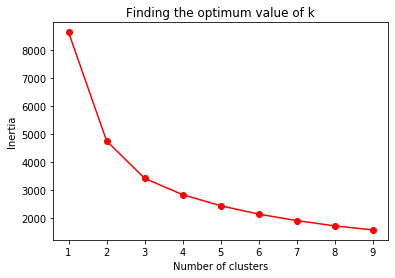

In [126]:
wcss = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(subd11)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [127]:
wcss

[8644.82356403661,
 4762.866849954518,
 3423.669530965103,
 2839.360313022254,
 2443.8387326995544,
 2142.95908760153,
 1913.9448368718201,
 1723.518893322926,
 1579.9369804115481]

In [128]:
skmod1 = KMeans(n_clusters=4,n_init=12,random_state=22)
skmod1.fit(subd11)


KMeans(n_clusters=4, n_init=12, random_state=22)

In [129]:
skmod1.cluster_centers_

array([[-0.15924033, -0.30510284, -0.3952594 , -0.16514874, -0.33857535],
       [ 0.47622586,  1.32376344,  2.00224765,  0.46480091,  1.5160104 ],
       [ 0.05102922,  0.23835662,  0.52786697,  0.06182423,  0.29364088],
       [ 1.97563772,  3.84446544,  0.98423909,  2.08355375,  4.13207227]])

In [130]:
centroids=skmod1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(subd11))
columns = list(subd11)
centroid_df.columns=subd11.columns 
centroid_df

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,-0.159240,-0.305103,-0.395259,-0.165149,-0.338575
1,0.476226,1.323763,2.002248,0.464801,1.516010
2,0.051029,0.238357,0.527867,0.061824,0.293641
3,1.975638,3.844465,0.984239,2.083554,4.132072


In [131]:
skmod1.labels_

array([2, 0, 0, ..., 0, 1, 0])

In [132]:
subd11_k = subd11.copy()

In [133]:
subd11_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687
4332,0.007387,1.537884,2.351222,0.040651,1.711810


In [134]:
subd11_k['labels'] = skmod1.labels_

In [135]:
subd11_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.256297,0.360219,0.487280,0.251450,0.531437,2
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437,2
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0
4332,0.007387,1.537884,2.351222,0.040651,1.711810,1


In [136]:
subd11_k['labels'].value_counts()

0    3004
2    1018
1     243
3      51
Name: labels, dtype: int64

In [137]:
subd11_k[subd11_k.labels==0]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
6,-0.216741,-0.424890,-0.673288,-0.232019,-0.480312,0
7,-0.105749,-0.424890,-0.040251,-0.130883,-0.480312,0
...,...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312,0
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0


In [138]:
subd11_k[subd11_k.labels==1]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
15,0.304176,0.752774,1.624402,0.199692,1.037311,1
66,0.491108,0.491071,2.280885,0.459869,0.531437,1
69,0.488552,1.407033,1.178931,0.338903,1.711810,1
71,1.272290,0.360219,1.847137,1.959457,0.362812,1
75,0.271697,1.799588,0.651400,0.337911,1.880435,1
...,...,...,...,...,...,...
4289,0.390680,1.014478,1.038256,0.407318,1.374561,1
4290,0.359181,0.883626,0.932750,0.451342,1.205936,1
4293,0.588791,2.061291,0.053532,0.257399,2.723559,1
4303,0.005612,1.668736,-0.016805,-0.027566,2.217685,1


In [139]:
subd11_k[subd11_k.labels==2]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.256297,0.360219,0.487280,0.251450,0.531437,2
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437,2
10,0.468965,-0.424890,0.815521,0.301027,-0.480312,2
12,0.487446,-0.032336,1.788523,0.085667,0.025562,2
13,0.031272,-0.163187,0.499003,-0.006744,-0.143063,2
...,...,...,...,...,...,...
4301,-0.051709,0.098516,0.217653,-0.078332,0.194187,2
4305,0.060970,0.360219,1.073425,0.118585,0.194187,2
4313,0.035258,0.491071,0.416942,-0.029549,0.531437,2
4315,0.069503,0.229368,0.287990,0.057111,0.362812,2


In [140]:
subd11_k[subd11_k.labels==3]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
100,1.725960,2.977253,1.014811,1.371084,2.554934,3
177,0.126600,3.631511,0.346605,0.110455,3.735308,3
273,1.009194,3.500659,1.718185,0.855688,3.903933,3
431,1.751791,3.108104,-0.368493,4.339919,3.229434,3
445,1.632164,4.285769,2.011258,1.653075,3.229434,3
453,4.486405,1.407033,-0.391938,5.317367,1.374561,3
481,1.027314,10.697500,0.381774,1.606076,11.323424,3
555,1.188471,2.846401,0.393496,0.880476,3.566683,3
570,3.010077,3.108104,1.108594,2.930560,3.735308,3
581,1.145663,2.584698,0.393496,0.367856,3.229434,3


In [141]:
from sklearn.metrics import silhouette_score


In [142]:
skmod1.inertia_

2839.3603130222546

In [143]:
silhoutte_k2 = silhouette_score(subd11, subd11_k['labels'])
silhoutte_k2

0.5368529689576352

## Iteration 1

### Observations: 

K-Means:

Class 0 : 3004

Class 1 : 243

Class 2 : 1018

Class 3: 51

Inertia: 2839.3603130222546

Silhouette Score: 0.5368529689576352

AGC:

Class 0: 570

Class 1: 1030

Class 2: 103

Class 3: 2613

Inertia: 3143.329167824849

Silhoutte Score: 0.4480914596053203

Inference: K-Means is a better model than AGC. 4 subclusters are formed.

In [144]:
csdata_sub

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
5,12352.0,1385.74,7,57,526,7
...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2
4332,18283.0,2088.93,16,262,1395,14


In [145]:
subd11_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.256297,0.360219,0.487280,0.251450,0.531437,2
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437,2
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0
4332,0.007387,1.537884,2.351222,0.040651,1.711810,1


In [146]:
csdata_sub['labels'] = skmod1.labels_

C:\Users\sathv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
csdata_sub

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,12347.0,4310.00,7,103,2458,7,2
2,12348.0,1437.24,4,21,2332,4,0
3,12349.0,1457.55,1,72,630,1,0
4,12350.0,294.40,1,16,196,1,0
5,12352.0,1385.74,7,57,526,7,2
...,...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1,0
4330,18281.0,80.82,1,7,54,1,0
4331,18282.0,178.05,2,12,103,2,0
4332,18283.0,2088.93,16,262,1395,14,1


In [148]:
csdata_high

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77183.60,1,1,74215,1,1
55,12415.0,124564.53,20,443,77373,15,1
326,12748.0,32317.32,206,1766,25511,113,1
562,13089.0,58825.83,97,636,31070,66,1
996,13694.0,65039.62,50,366,63312,35,1
1333,14156.0,117379.63,55,714,57885,43,1
1434,14298.0,51527.30,44,884,58343,25,1
1661,14606.0,12006.65,90,816,6214,88,1
1689,14646.0,279138.02,72,699,196844,45,1
1879,14911.0,140450.72,199,1786,80263,131,1


In [149]:
csdata_highf = csdata_high.replace({'labels':{1:4}})

In [150]:
csdata_highf

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77183.60,1,1,74215,1,4
55,12415.0,124564.53,20,443,77373,15,4
326,12748.0,32317.32,206,1766,25511,113,4
562,13089.0,58825.83,97,636,31070,66,4
996,13694.0,65039.62,50,366,63312,35,4
1333,14156.0,117379.63,55,714,57885,43,4
1434,14298.0,51527.30,44,884,58343,25,4
1661,14606.0,12006.65,90,816,6214,88,4
1689,14646.0,279138.02,72,699,196844,45,4
1879,14911.0,140450.72,199,1786,80263,131,4


# Final Customer Details

In [151]:
csdata_final = pd.concat([csdata_highf,csdata_sub])

In [152]:
csdata_final

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77183.60,1,1,74215,1,4
55,12415.0,124564.53,20,443,77373,15,4
326,12748.0,32317.32,206,1766,25511,113,4
562,13089.0,58825.83,97,636,31070,66,4
996,13694.0,65039.62,50,366,63312,35,4
...,...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1,0
4330,18281.0,80.82,1,7,54,1,0
4331,18282.0,178.05,2,12,103,2,0
4332,18283.0,2088.93,16,262,1395,14,1


## Class 0 Customers : Least Revenue Generating And Least Frequent Customers

In [153]:
a1 = csdata_final[csdata_final['labels']==0]
print(a1)

      CustomerID  Revenue  Tot_Trans  uniqueproducts  Quantity  Retention  \
2        12348.0  1437.24          4              21      2332          4   
3        12349.0  1457.55          1              72       630          1   
4        12350.0   294.40          1              16       196          1   
6        12353.0    89.00          1               4        20          1   
7        12354.0  1079.40          1              58       530          1   
...          ...      ...        ...             ...       ...        ...   
4328     18278.0   173.90          1               9        66          1   
4329     18280.0   180.60          1              10        45          1   
4330     18281.0    80.82          1               7        54          1   
4331     18282.0   178.05          2              12       103          2   
4333     18287.0  1837.28          3              59      1586          3   

      labels  
2          0  
3          0  
4          0  
6          0  


In [154]:
a1.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.0
mean,15305.348202,602.087960,1.915446,27.716711,357.208389,1.840546,0.0
std,1724.421286,975.560425,1.181572,20.966744,480.082120,1.096208,0.0
min,12348.000000,3.750000,1.000000,1.000000,1.000000,1.000000,0.0
25%,13805.750000,219.955000,1.000000,11.000000,117.000000,1.000000,0.0
50%,15307.500000,401.500000,2.000000,23.000000,232.000000,1.000000,0.0
75%,16778.500000,746.722500,2.000000,39.250000,443.000000,2.000000,0.0
max,18287.000000,39916.500000,8.000000,108.000000,8000.000000,7.000000,0.0


In [155]:
csdata_f0 = csdata_final[csdata_final['labels']==0]

In [156]:
csdata_f0['Retention'].mean()

1.8405459387483356

In [157]:
csdata_f0

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
2,12348.0,1437.24,4,21,2332,4,0
3,12349.0,1457.55,1,72,630,1,0
4,12350.0,294.40,1,16,196,1,0
6,12353.0,89.00,1,4,20,1,0
7,12354.0,1079.40,1,58,530,1,0
...,...,...,...,...,...,...,...
4328,18278.0,173.90,1,9,66,1,0
4329,18280.0,180.60,1,10,45,1,0
4330,18281.0,80.82,1,7,54,1,0
4331,18282.0,178.05,2,12,103,2,0


## Class 1 Customers - Customers with moderate frequency of purchase and moderate revenue generated.

In [158]:
a2 = csdata_final[csdata_final['labels']==1]

In [159]:
a2.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.0
mean,15395.596708,6254.500165,14.345679,232.144033,3524.440329,12.814815,1.0
std,1754.403561,5485.246474,5.322245,123.127528,2386.745981,4.554839,0.0
min,12362.000000,1414.430000,2.000000,13.000000,689.000000,2.000000,1.0
25%,14052.500000,3469.720000,10.000000,149.000000,2026.500000,9.000000,1.0
50%,15356.000000,5074.770000,14.000000,226.000000,2871.000000,13.000000,1.0
75%,16907.000000,7215.450000,18.000000,292.000000,4469.500000,16.000000,1.0
max,18283.000000,53258.430000,31.000000,1118.000000,19068.000000,26.000000,1.0


In [160]:
csdata_f1 = csdata_final[csdata_final['labels']==1]
csdata_f1.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.0
mean,15395.596708,6254.500165,14.345679,232.144033,3524.440329,12.814815,1.0
std,1754.403561,5485.246474,5.322245,123.127528,2386.745981,4.554839,0.0
min,12362.000000,1414.430000,2.000000,13.000000,689.000000,2.000000,1.0
25%,14052.500000,3469.720000,10.000000,149.000000,2026.500000,9.000000,1.0
50%,15356.000000,5074.770000,14.000000,226.000000,2871.000000,13.000000,1.0
75%,16907.000000,7215.450000,18.000000,292.000000,4469.500000,16.000000,1.0
max,18283.000000,53258.430000,31.000000,1118.000000,19068.000000,26.000000,1.0


In [161]:
csdata_f1['Retention'].mean()

12.814814814814815

## Class 2 Customers : Customers with low frequency of purchase and low revenue.

In [162]:
csdata_f2 = csdata_final[csdata_final['labels']==2]
csdata_f2

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,12347.0,4310.00,7,103,2458,7,2
5,12352.0,1385.74,7,57,526,7,2
10,12357.0,6207.67,1,131,2708,1,2
12,12359.0,6372.58,4,214,1622,4,2
13,12360.0,2302.06,3,104,1156,3,2
...,...,...,...,...,...,...,...
4301,18239.0,1561.61,5,80,795,5,2
4305,18245.0,2567.06,7,153,1788,5,2
4313,18257.0,2337.63,8,97,1041,7,2
4315,18260.0,2643.20,6,86,1478,6,2


In [163]:
csdata_f2.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.0
mean,15261.658153,2478.918685,6.064833,106.359528,1502.023576,5.588409,2.0
std,1698.728818,2303.365554,2.870821,48.786719,1409.334162,2.518866,0.0
min,12347.000000,302.100000,1.000000,4.000000,104.000000,1.000000,2.0
25%,13843.750000,1325.512500,4.000000,73.000000,758.500000,4.000000,2.0
50%,15270.500000,2003.715000,6.000000,100.000000,1183.000000,5.000000,2.0
75%,16741.000000,2990.947500,8.000000,133.000000,1784.000000,7.000000,2.0
max,18272.000000,44534.300000,34.000000,312.000000,18028.000000,15.000000,2.0


In [164]:
csdata_f2['Retention'].mean()

5.588408644400785

## Class 3 Customers : Customers with fairly high frequency of purchase and fairly high revenue generated.

In [165]:
csdata_final[csdata_final['labels']==3]

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
100,12471.0,17424.05,27,148,8104,19,3
177,12569.0,3152.69,32,91,1747,26,3
273,12682.0,11028.22,31,208,5505,27,3
431,12901.0,17654.54,28,30,23075,23,3
445,12921.0,16587.09,37,233,9526,23,3
453,12931.0,42055.96,15,28,28004,12,3
481,12971.0,11189.91,86,94,9289,71,3
555,13078.0,12627.94,26,95,5630,25,3
570,13098.0,28882.44,28,156,15968,26,3
581,13113.0,12245.96,24,95,3045,23,3


In [166]:
csdata_f3 = csdata_final[csdata_final['labels']==3]
csdata_f3.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,15292.352941,19651.964706,33.627451,145.392157,11696.784314,28.352941,3.0
std,1861.712103,13592.869263,12.779610,115.729007,9599.825034,11.079393,0.0
min,12471.000000,1296.440000,13.000000,9.000000,560.000000,12.000000,3.0
25%,13438.000000,9205.780000,26.000000,53.000000,4241.000000,21.500000,3.0
50%,15159.000000,16587.090000,31.000000,97.000000,8887.000000,26.000000,3.0
75%,17279.000000,27371.920000,37.000000,226.000000,15752.000000,32.000000,3.0
max,18109.000000,58030.480000,86.000000,448.000000,33704.000000,71.000000,3.0


In [167]:
csdata_f3['Retention'].mean()

28.352941176470587

## Class 4 Customers - High Revenue Generation Customers and Highly Frequent Customers

In [168]:
csdata_final[csdata_final['labels']==4]

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77183.60,1,1,74215,1,4
55,12415.0,124564.53,20,443,77373,15,4
326,12748.0,32317.32,206,1766,25511,113,4
562,13089.0,58825.83,97,636,31070,66,4
996,13694.0,65039.62,50,366,63312,35,4
1333,14156.0,117379.63,55,714,57885,43,4
1434,14298.0,51527.30,44,884,58343,25,4
1661,14606.0,12006.65,90,816,6214,88,4
1689,14646.0,279138.02,72,699,196844,45,4
1879,14911.0,140450.72,199,1786,80263,131,4


In [169]:
csdata_f4 = csdata_final[csdata_final['labels']==4]
csdata_f4.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,15126.833333,106302.636667,71.000000,605.111111,61244.555556,50.055556,4.0
std,1901.124969,75963.865257,57.813086,554.466876,40187.925839,40.159201,0.0
min,12346.000000,12006.650000,1.000000,1.000000,6214.000000,1.000000,4.0
25%,13809.500000,59311.347500,34.250000,130.500000,38697.250000,25.250000,4.0
50%,14778.500000,75032.845000,57.500000,510.000000,60827.500000,36.500000,4.0
75%,16624.500000,136479.172500,90.750000,790.500000,73159.500000,82.500000,4.0
max,18102.000000,279138.020000,206.000000,1786.000000,196844.000000,131.000000,4.0


In [170]:
csdata_f4['Retention'].mean()

50.05555555555556

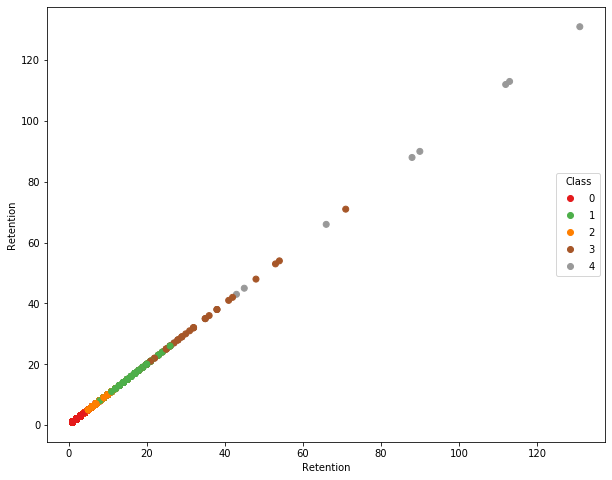

In [171]:
plt.figure(figsize=(10,8))
scatter1 = plt.scatter(csdata_final['Retention'],csdata_final['Retention'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Retention')
plt.ylabel('Retention')
plt.legend(*scatter1.legend_elements(),
                    loc="center right", title="Class")
plt.show()

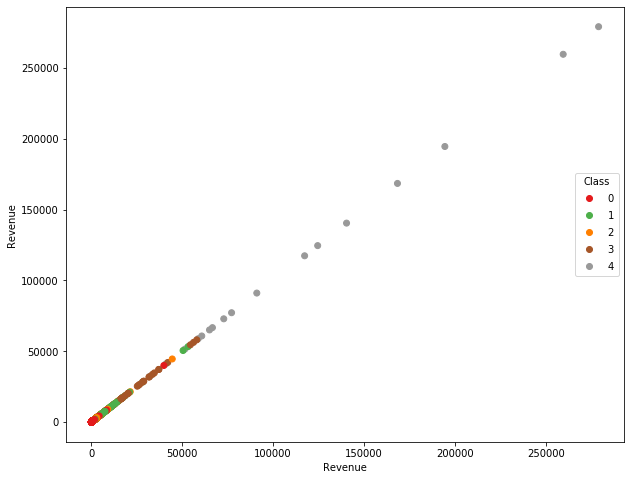

In [172]:
plt.figure(figsize=(10,8))
scatter1 = plt.scatter(csdata_final['Revenue'],csdata_final['Revenue'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Revenue')
plt.ylabel('Revenue')
plt.legend(*scatter1.legend_elements(),
                    loc="center right", title="Class")
plt.show()

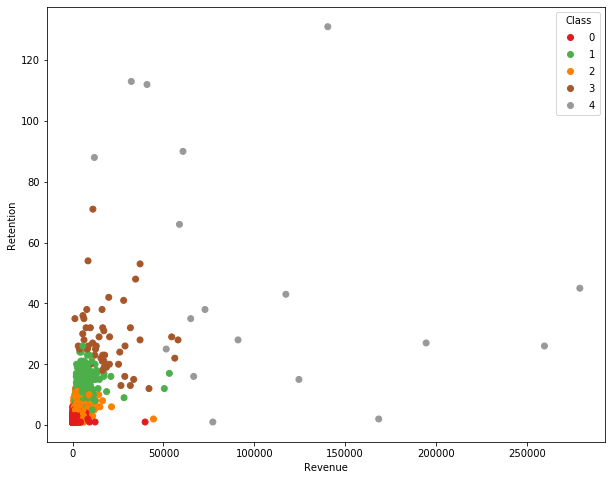

In [173]:
plt.figure(figsize=(10,8))
scatter1 = plt.scatter(csdata_final['Revenue'],csdata_final['Retention'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Revenue')
plt.ylabel('Retention')
plt.legend(*scatter1.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

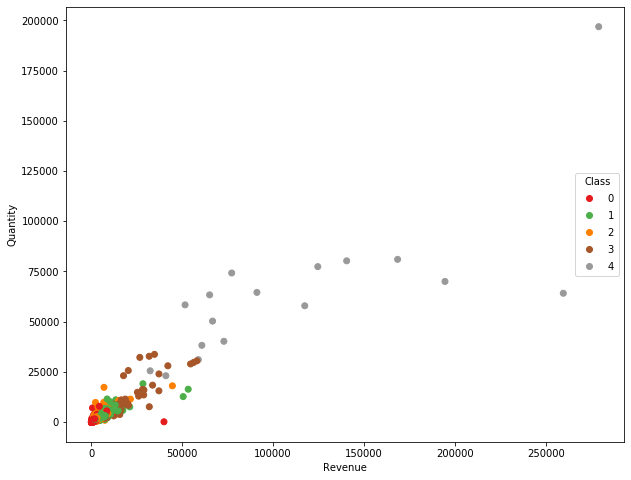

In [174]:
plt.figure(figsize=(10,8))
scatter2 = plt.scatter(csdata_final['Revenue'],csdata_final['Quantity'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.legend(*scatter2.legend_elements(),
                    loc="center right", title="Class")
plt.show()

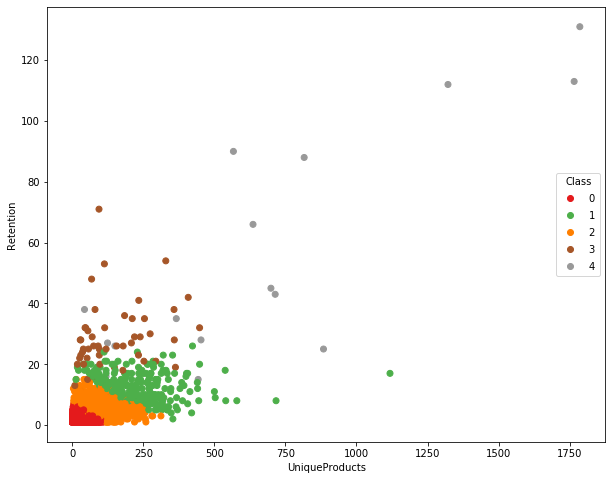

In [175]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(csdata_final['uniqueproducts'],csdata_final['Retention'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('UniqueProducts')
plt.ylabel('Retention')
plt.legend(*scatter3.legend_elements(),
                    loc="center right", title="Class")
plt.show()

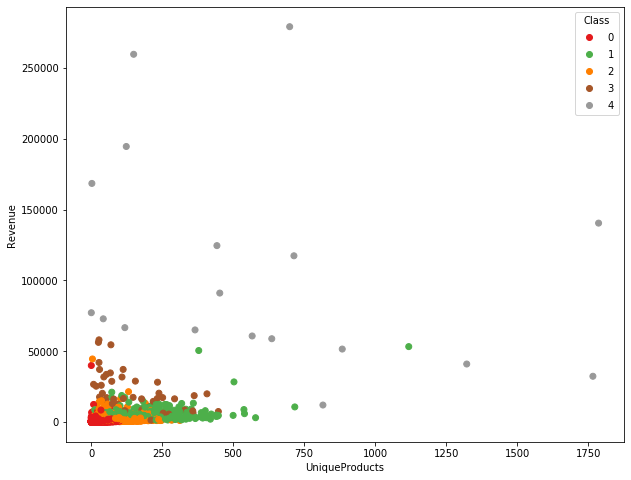

In [176]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(csdata_final['uniqueproducts'],csdata_final['Revenue'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('UniqueProducts')
plt.ylabel('Revenue')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

C:\Users\sathv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sathv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


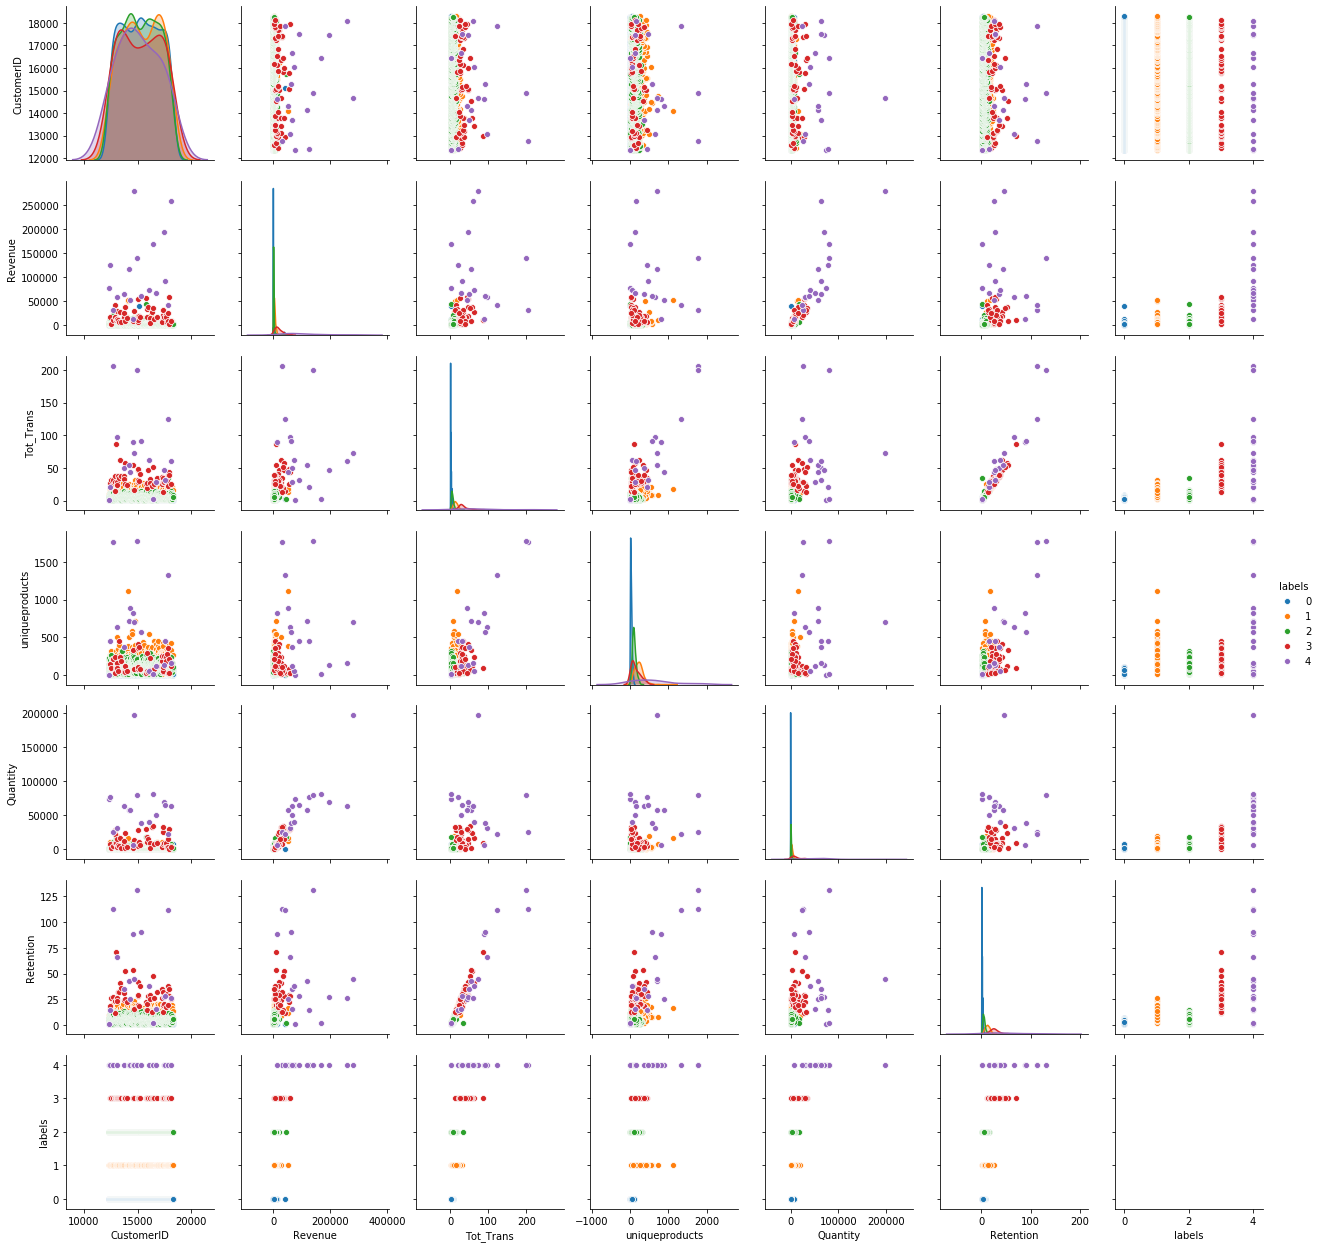

In [177]:
sns.pairplot(csdata_final,hue = 'labels')

In [178]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

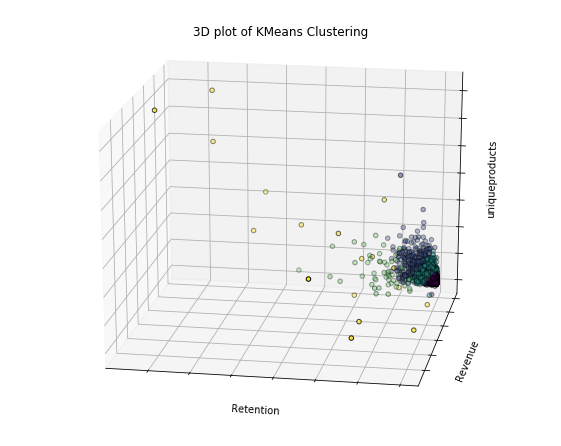

In [179]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(csdata_final['Retention'], csdata_final['Revenue'], csdata_final['uniqueproducts'],c=csdata_final['labels']
           .astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Retention')
ax.set_ylabel('Revenue')
ax.set_zlabel('uniqueproducts')
ax.set_title('3D plot of KMeans Clustering')


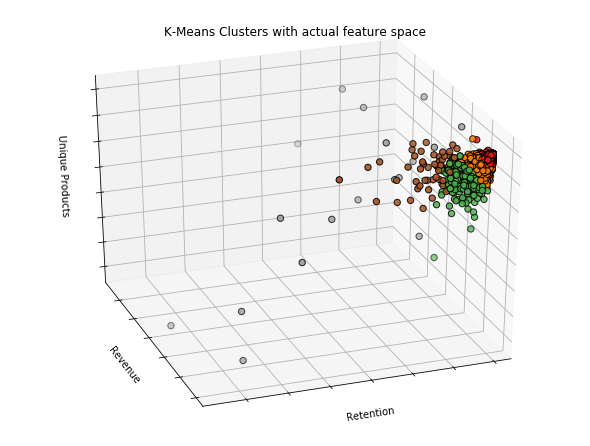

In [180]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=-250)
ax.scatter(csdata_final['Retention'], csdata_final['Revenue'], csdata_final['uniqueproducts'], c=csdata_final['labels'],
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("K-Means Clusters with actual feature space")
ax.set_xlabel("Retention")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Revenue")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Unique Products")
ax.w_zaxis.set_ticklabels([])

plt.show()

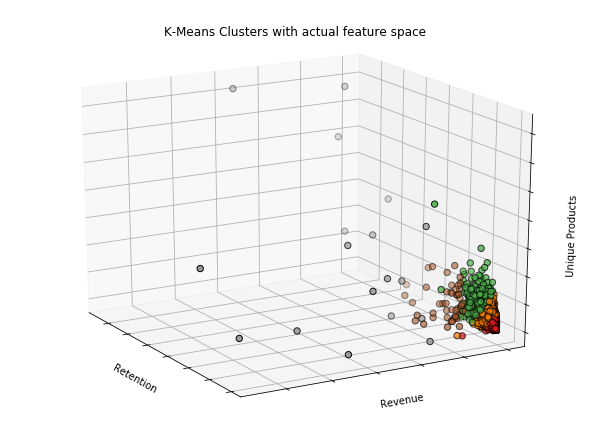

In [181]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=20, azim=150)
ax.scatter(csdata_final['Retention'], csdata_final['Revenue'], csdata_final['uniqueproducts'], c=csdata_final['labels'],
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("K-Means Clusters with actual feature space")
ax.set_xlabel("Retention")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Revenue")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Unique Products")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [182]:
csdata_final.to_csv('csdata_final.csv')

# Conclusion

## Clustering Results

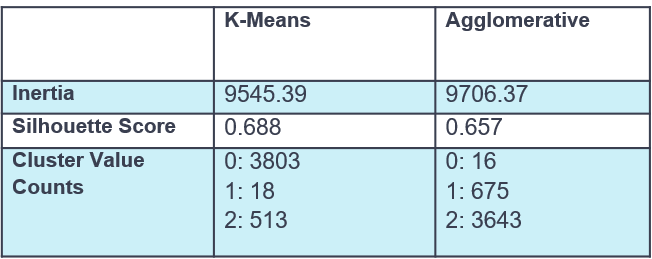

## Sub-Clustering Results

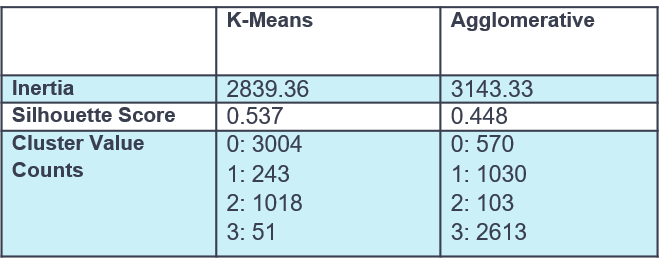

# Summary

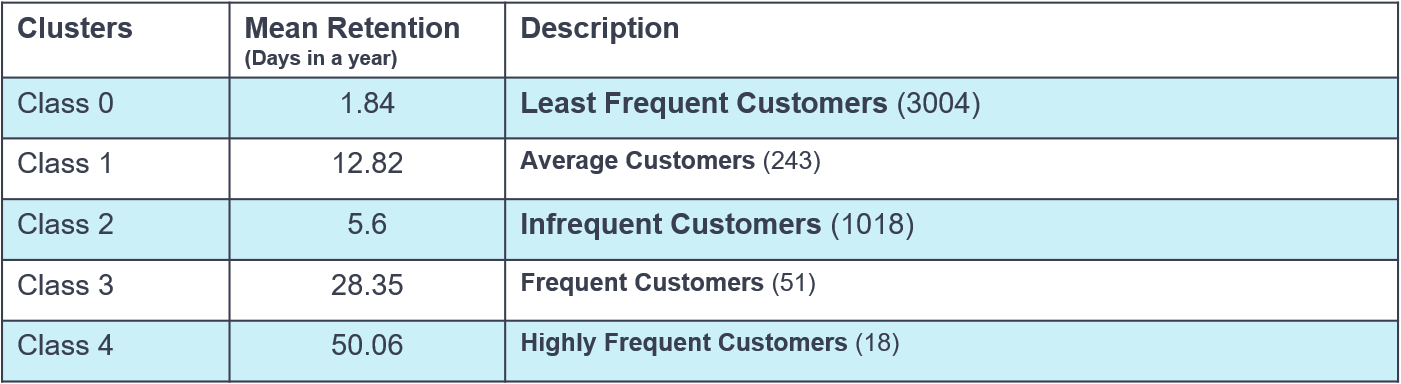